<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The integrated Volterra square-root process</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider an non-decreasing Volterra process $X$ of the form:
$$
X_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (b X_sds + c W_{X_s} ds) 
$$
where  $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$) $  c \geq 0$ and $b \in \mathbb R$, $W_t$ is a standard Brownian motion and $g_0$ a suitable input curve. We will take:
$$ g_0(t) = V_0 + a \int_0^t K(r)dr, $$
with $a,V_0 \geq 0$. 

If $K\in L^2([0,T])$, then one can show using stochastic Fubini's theorem that $X$ is absolutely continuous with respect to the Lebesgue measure, i.e. $X = \int_0^{\cdot} V_s ds$ almost surely, and that the nonnegative density process $V$ satisfies a square-root stochastic Volterra equation in the form 
$$ V_t = g_0(t) + \int_0^t K(t-s) (b V_s ds + c\sqrt{V_s}dW_s). $$
In particular for the fractional kernel 
$$ K_H(t) = \frac{1}{\Gamma(H+0.5)}t^{H-1/2}, $$
with $H \in (0,1/2]$ one recovers the rough square-root process used for instance to model the instanteneous variance of a stock.  In this case, $X$ plays the role of the integrated variance. 

If $H \in (-1/2,0]$, $K_H$ is no longer in $L^2$ but only in $L^1$ but still the equation for $X$ makes sense, but $X$ is no longer absolutely continuous with respect to the Lebsegue measure, and the process $V$ no longer makes sense. 

In the sequel, we will develop a simple scheme to simulate $X$ for any kernel $K \in L^1([0,T])$. We won't bother with the process $V$.  The difficult part is to construct a scheme for which $X$ is non-decreasing. 





<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define 
$$ U_{t,s} := X_s - X_t, \quad Z_{t,s}  = \int_t^s dW_{X_u}, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (bdU_{0,u} + c dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ V_s | \mathcal F_t]$ with $V$ the density process.)

Using the equation for $X$, the dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du ( b U_{t,s} + cZ_{t,s}) = \int_0^{t-s} K(u) du  ( b U_{t,s} + cZ_{t,s})
$$


This leads to the scheme
$$ 
U_{i,i+1}  = \alpha_i + b K_{i}  U_{i,i+1} + c  K_{i}   W_{U_{i,i+1}}
$$
with 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   K_i = \int_0^{t_{i+1}-t_{i}} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $X$ satisfying 
$$ X = \alpha + \sigma W_X  $$
but this is nothing than an **Inverse Gaussian** distribution 
$$ X = IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (bdU_{{t_j},u} + c dZ_{{t_j},u}),   $$
so that an application of Fubini yields 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (bdU_{t_{j},u} + c dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1}  K_{ij}  \int_{t_{j}}^{t_{j+1}}  (bdU_{t_{j},u} + c dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  K_{ij} (b U_{t_{j},t_{j+1}} + c Z_{t_{j},t_{j+1}})   ,  $$
with 

$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme 



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$ 
First we compute $\alpha_i$ 
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   K_{ij} (b U_{j,j+1}  +  c Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and 
$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first use the expression for the integrated variance 
$$
U_{i,{i+1}}  = \alpha_i  + b K_i U_{i,i+1}   + c K_i  W_{U_{i,i+1}} .
$$
to simulate  (here we need $1-bK_i\geq 0$, but usually $b\leq 0$ so it is verified)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - b K_i}, \left(\frac{\alpha_i}{c K_i}\right)^2 \right) $$
and we set $Z_{i,i+1} = \frac{1}{c K_i}( (1-bK_i)U_{i,i+1} - \alpha_i)$.



**TO DO:** argue that $\alpha_i\geq 0$ for all $i$ so that the scheme is well-defined. Numerics say its true. Also figure out a way to recover sample paths of the variance process $V$ (when it exists) from $U$ and $Z$. 




# Comparison with the Markovian case
When $K(t)=\exp(bt)$, then one can show that $g_t(s) = E[V_s|\mathcal F_t] = V_t e^{b(t-s)} + \frac{a}{b}(1- e^{b(t-s)})$ and in this case $g_0(t) = V_0 e^{bt} +\frac{a}{b}(1- e^{b t}) $. So the expression for $g_t$ simplifies, as well as the expression for $\alpha$.  Note that $\alpha$ encodes all the non-Markovianity without additionnal information. As sanity check we implement the scheme for the exponential kernel **simulate_exp_vectorized** below here with the full alpha as above, and compared it with the scheme we implemented previsoulsy and they match...  




# Fractional kernel
$$K_H(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = V_0 + a \frac{t^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)} $$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = V_0  (t_{i+1} -t_i) +  a \frac{t_{i+1}^{H + 1.5} -t_i^{H + 1.5}}{(H + 1.5 )(H + 0.5 )\Gamma(H+0.5)}    $$
$$  K_i = \int_0^{t_{i+1} - t_i} K(u) du = \frac{(t_{i+1} -t_i)^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)}, \quad i =0, \ldots, n.$$
$$ K_{ij} = \int_{t_i}^{t_{i+1}} K(u - t_j) du  =  \frac{(t_{i+1} -t_j)^{H + 0.5} -(t_{i} -t_j)^{H + 0.5}  }{(H + 0.5 )\Gamma(H+0.5)}, \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n $$

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma

from volterra_hawkes.iVi.iVi_volterra_vol_model import IVIVolterraVolModel
from volterra_hawkes.kernel.exponential_kernel import ExponentialKernel
from volterra_hawkes.kernel.constant_kernel import ConstantKernel
from volterra_hawkes.kernel.fractional_kernel import FractionalKernel

color_cycle = ["#5b6c64", "#B56246", "#322B4D", "#28BC9C", "#71074E"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle) 

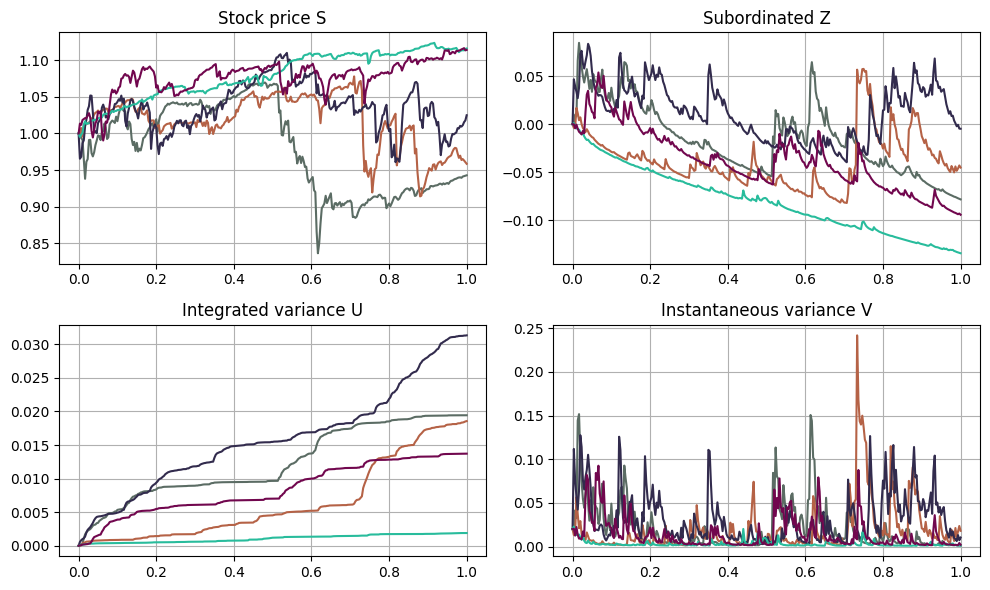

In [3]:
H = 0.1
a, b, c = 0.02, - 0.3, .3
V_0 = 0.02
rho = -0.7

T = 1
    
kernel = FractionalKernel(H=H)

def g0(t):
    return V_0 + a * kernel.integrated_kernel(t)

def g0_bar(t):
    return V_0 * t + a * kernel.double_integrated_kernel(t)
    

rng = np.random.default_rng(seed=42)
model = IVIVolterraVolModel(is_continuous=True, resolvent_flag=False, kernel=kernel, g0_bar=g0_bar, rng=rng, b=b, c=c, g0=g0, rho=rho)

n_steps = 300
n_paths = 5
t_grid = np.linspace(0, T, n_steps + 1)
S, U, Z, V = model.simulate_price(n_paths=n_paths, t_grid=t_grid)

fig = plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t_grid, S[:, 0:10])
plt.title('Stock price S')
plt.subplot(2, 2, 2)
plt.plot(t_grid, Z[:, 0:10])
plt.title('Subordinated Z')
plt.subplot(2, 2, 3)
plt.plot(t_grid, U[:, :10])
plt.title('Integrated variance U')
plt.subplot(2, 2, 4)
plt.plot(t_grid, V[:, :10])
plt.title('Instantaneous variance V')
plt.show()

# First test , fractional kernel

Parameters as in Figures 1, 4 and 5 in:
https://epubs.siam.org/doi/pdf/10.1137/21M1443807?casa_token=7as5_DHgp6gAAAAA:J1jlH9d5L2BPaaYkRU4xX-b9bPpk_fz8NY1OLCivmInasR55EPoAzR_-VVgbAfGAifXLGDh1RCEXIQ

In [9]:
H = 0.1
a, b, c = 0.02, - 0.3, .3
V_0 = 0.02
rho = -0.7

kernel = FractionalKernel(H=H)
def g0_bar(t):
    return V_0 * t + a * kernel.double_integrated_kernel(t)
    
def g0(t):
    return V_0 + a * kernel.integrated_kernel(t)
    
rng = np.random.default_rng(seed=42)
model = IVIVolterraVolModel(is_continuous=True, resolvent_flag=False, kernel=kernel,
                            g0_bar=g0_bar, rng=rng, b=b, c=c, g0=g0, rho=rho)

T = 1. 
K = 1. 
K_U = V_0 

n_paths = 100_000
n_steps_list = [1, 10, 20, 30, 40, 50, 60, 70, 100, 200, 300, 500]
MC_mean_vec = []
MC_std_vec = []
MC_U_mean_vec = []
MC_U_std_vec  = []
MC_Ucall_mean_vec  = []
MC_Ucall_std_vec  = []

for n_steps in n_steps_list:
    t_grid = np.linspace(0, T, n_steps + 1)
    S, U, Z, V = model.simulate_price(t_grid=t_grid, n_paths=n_paths)
    
    MC_mean = np.mean(np.maximum(S[-1] - K , 0.))
    MC_std = np.std(np.maximum(S[-1] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    
    MC_mean = np.mean(U[-1])
    MC_std = np.std(U[-1])
    MC_U_mean_vec.append(MC_mean)
    MC_U_std_vec.append(MC_std)
    
    MC_mean = np.mean(np.maximum(U[-1] - K_U , 0.))
    MC_std = np.std(np.maximum(U[-1] - K_U, 0.))
    MC_Ucall_mean_vec.append(MC_mean)
    MC_Ucall_std_vec.append(MC_std)

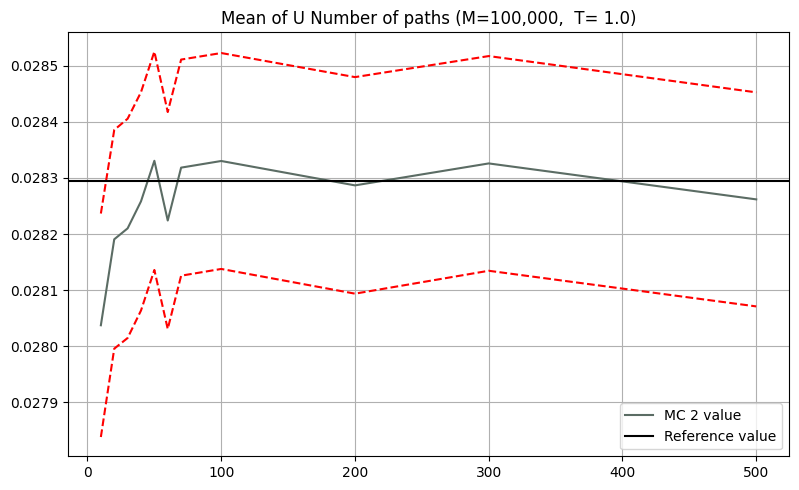

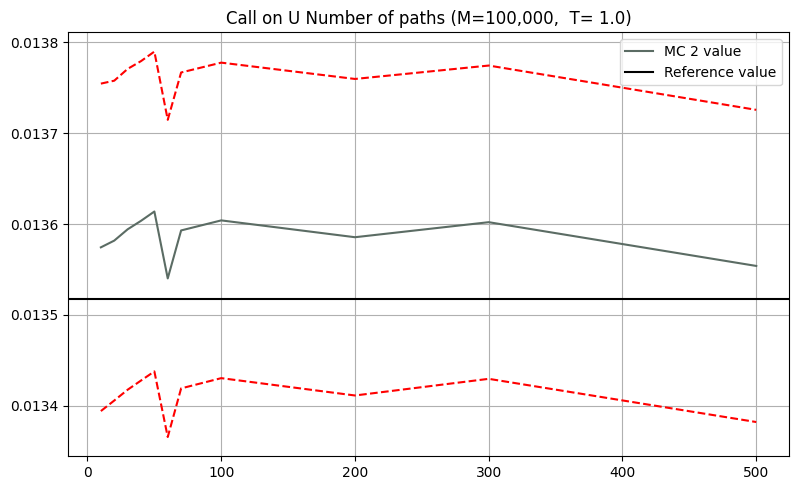

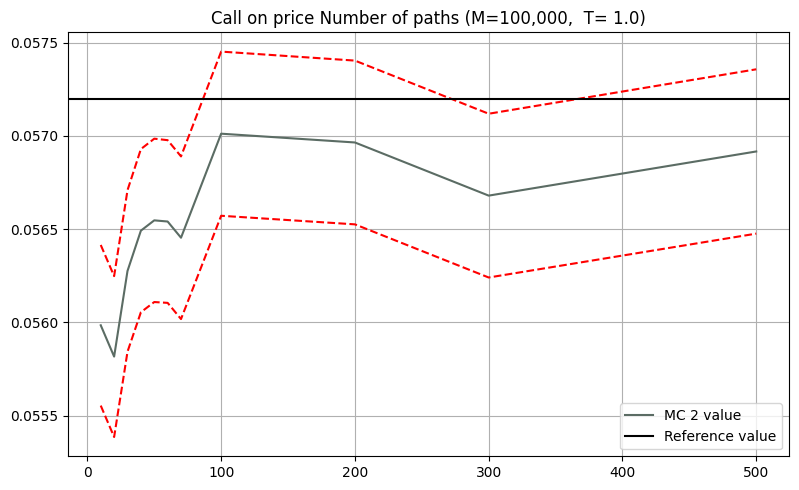

In [10]:
mmm = 1
plt.plot(n_steps_list[mmm:], MC_U_mean_vec[mmm:], label = 'MC 2 value')
plt.plot(n_steps_list[mmm:], MC_U_mean_vec[mmm:] - 1.96*np.array(MC_U_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(n_steps_list[mmm:], MC_U_mean_vec[mmm:] + 1.96*np.array(MC_U_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y = 0.028295 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Mean of U Number of paths (M={n_paths:,},  T= {T})")
plt.show()

plt.plot(n_steps_list[mmm:], MC_Ucall_mean_vec[mmm:], label = 'MC 2 value')
plt.plot(n_steps_list[mmm:], MC_Ucall_mean_vec[mmm:] - 1.96*np.array(MC_Ucall_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(n_steps_list[mmm:], MC_Ucall_mean_vec[mmm:] + 1.96*np.array(MC_Ucall_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y = 0.013517 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Call on U Number of paths (M={n_paths:,},  T= {T})")
plt.show()

plt.plot(n_steps_list[mmm:], MC_mean_vec[mmm:], label = 'MC 2 value')
plt.plot(n_steps_list[mmm:], MC_mean_vec[mmm:] - 1.96*np.array(MC_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(n_steps_list[mmm:], MC_mean_vec[mmm:] + 1.96*np.array(MC_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y = 0.0572 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Call on price Number of paths (M={n_paths:,},  T= {T})")
plt.show()